App Stat 2016 exam:

## Import functions

In [1]:
#Other good imports                        
from numpy.linalg import matrix_power                                                                       
from iminuit import Minuit                                                                 
from scipy.integrate import quad
import sympy as sp
from sympy import integrate , print_latex
import pandas as pd
from IPython.display import display


#Packages needed for the external functions
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.metrics import roc_curve, auc
from iminuit.util import make_func_code
from iminuit import describe 


# import sequence of functions from external file
import sys 
sys.path.append('../External_Functions')
from MyExternalFunctions import *

Matplotlib_settings()

## 1) 


### 1.1) 

In [2]:
# Two games of dice, each giving the player equal odds are played. In the first game played 
# with one dice, the player wins if getting one six in 4 rolls, while in the second game played with
# two die, the player wins if getting two sixes (at the same time) in 24 rolls (with two die).
# Calculate the odds of winning in both games. Which game would you play, if either?

# we are here talking about the probability of 1 six or more in 4 rolls and 2 sixes or more in 24 rolls

p_1dice_fail = 5/6              # 6 possible outcomes, 5 of them are not 6
p_2dice_fail = 35/36            # 36 possible outcomes, 35 of them are not 2 sixes


# calculated directly: 

probability_game1 = 1 - (p_1dice_fail)**4
probability_game2 = 1 - (p_2dice_fail)**24

print(f'Probability of winning game1: {probability_game1:.3f}')
print(f'Probability of winning game2: {probability_game2:.3f}')

# calculated with survival function:

probability_game1 = stats.binom.sf(3, 4, p_1dice_fail)             # sf gives the probability of getting 3 or less non-sixes
probability_game2 = stats.binom.sf(23, 24, p_2dice_fail)           # sf gives the probability of getting 23 or less non-sixes

print(f'Probability of winning game1: {1-probability_game1:.3f}')
print(f'Probability of winning game2: {1-probability_game2:.3f}')

# calculated with probability mass function:

probability_game1 = stats.binom.pmf(4, 4, p_1dice_fail)           # pmf gives the probability of getting exactly 4 non-sixes
probability_game2 = stats.binom.pmf(24, 24,p_2dice_fail)          # pmf gives the probability of getting exactly 24 non-sixes

print(f'Probability of winning game1: {1-probability_game1:.3f}')
print(f'Probability of winning game2: {1-probability_game2:.3f}')



probability_game1 = stats.binom.cdf(0, 4, 1/6)                  # cdf gives the probability of getting 0 sixes
probability_game2 = stats.binom.cdf(0, 24,1/36)                 # cdf gives the probability of getting 0 pairs of sixes

print(f'Probability of winning game1: {1-probability_game1:.3f}')
print(f'Probability of winning game2: {1-probability_game2:.3f}')



Probability of winning game1: 0.518
Probability of winning game2: 0.491
Probability of winning game1: 0.518
Probability of winning game2: 0.491
Probability of winning game1: 0.518
Probability of winning game2: 0.491
Probability of winning game1: 0.518
Probability of winning game2: 0.491


### 1.2) 

In [3]:
# The IceCube experiment has been running for 1730 days, and has for a particular
# analysis found an average random background rate of 18.9 events per day.
# 1.2.1) What distribution should the daily number of (background) events follow?
print('It should be poisson distributed, since the number of events is discrete but lives in a countinous time-domain. lambda is average background rate pr. day: 18.9')



# 1.2.2) If the experiment in a single day saw 42 events, would that signify a statistically significant excess
lambda_icecube = 18.9
p_local_icecube = stats.poisson.sf(41, lambda_icecube)                              # sf gives the probability of getting 42 or more events
print(f'Probability of seeing 42 events in a single day: {p_local_icecube:.7f}')

p_global_icecube = 1-(1-p_local_icecube)**(1730)
print(f'Probability of seeing 42 events during the 1730 days: {p_global_icecube:.7f}')

It should be poisson distributed, since the number of events is discrete but lives in a countinous time-domain. lambda is average background rate pr. day: 18.9
Probability of seeing 42 events in a single day: 0.0000032
Probability of seeing 42 events during the 1730 days: 0.0054743


### 1.3)

In [4]:
# Assume that the height of Danish women follows a Gaussian distribution with a mean of 1.68 m and a standard deviation of 0.06 m.

# 1.3.1) What fraction of women are taller than 1.85 m?

mu = 1.68
sigma = 0.06
p_taller_than_185 = stats.norm.sf(1.85, mu, sigma)
print(f'Fraction taller than 1.85 m: {p_taller_than_185:.3f}')




# 1.2.2) Find (possibly numerically) the average height of the 20% tallest women?

height_20_tallest = stats.norm.ppf(1-0.2, mu, sigma)                                        #ppf gives the value of the distribution at a given probability
print(f'Average height of the 20% tallest is {height_20_tallest:.3f} m')


Fraction taller than 1.85 m: 0.002
Average height of the 20% tallest is 1.730 m


## 2) 

### 2.1) 

In [5]:
# The resistance of a cylindrical resistor is proportional to the length L, and inversel proportional to the cross sectional area A = πr2.
# 2.1.1) What should the relation between the relative uncertainties on L and r be for them to contribute equally to the uncertainty on the resistance?

resistance_eq, resistance_func , resistance_func_err, resistance_contrib = Errorpropagation('L/(pi*r**2)', 'L r')

sig_L = resistance_contrib[0]
sig_r = resistance_contrib[1]

display(sig_L)
display(sig_r)

print(sp.solve(sig_L - sig_r, 'sigma_r / r'))

print('The relative uncertainty on L should be 1/2 of the relative uncertainty on r')


sigma_L**2/(pi**2*r**4)

4*L**2*sigma_r**2/(pi**2*r**6)

[-sigma_L/(2*L), sigma_L/(2*L)]
The relative uncertainty on L should be 1/2 of the relative uncertainty on r


### 2.2) 

In [6]:
# A group of ten students have each measured the speed of a bullet, with results as follows:
v_bullet = [361, 200, 390, 223, 232, 248, 243, 386, 443, 378]           # m/s

# 2.2.1) Assuming independent measurements, what is the average speed and its uncertainty?
v_bullet_mean = np.mean(v_bullet)
v_bullet_std = np.std(v_bullet, ddof=1)
v_bullet_mean_err = v_bullet_std/np.sqrt(len(v_bullet))
print(f'2.2.1) Average speed: ({v_bullet_mean:.1f} +/- {v_bullet_mean_err:.1f}) m/s')


# 2.2.2) Given mbullet = 8.4 ± 0.5 g, what is the average kinetic energy, Ekin and its uncertainty?
m_bullet = 0.0084
m_bullet_err = 0.0005

ekin_eq, ekin_func , ekin_func_err, ekin_contrib = Errorpropagation('0.5*m*v**2', 'v m')


Ekin = ekin_func(v_bullet_mean, m_bullet)
Ekin_err = ekin_func_err(v_bullet_mean, m_bullet, v_bullet_mean_err, m_bullet_err)

print(f'2.2.2) Average kinetic energy: ({Ekin:.1f} +/- {Ekin_err:.1f}) J')


# 2.2.3) Which uncertainty dominates in determining Ekin? And if speed and mass uncertainties are to contribute evenly, what “suitable” number of speed measurements is needed in total?
print('2.2.3)')
v_contrib = ekin_contrib[0]
m_contrib = ekin_contrib[1]

display(v_contrib)
display(m_contrib)

v_contribution = v_contrib.subs({'v':v_bullet_mean, 'm':m_bullet, 'sigma_v':v_bullet_mean_err, 'sigma_m':m_bullet_err})
m_contribution = m_contrib.subs({'v':v_bullet_mean, 'm':m_bullet,   'sigma_v':v_bullet_mean_err,'sigma_m':m_bullet_err})

print('v_contribution =',v_contribution)
print('m_contribution =',m_contribution)

#how mane
N = sp.symbols('N')
N_measurements = sp.solve((1/sp.sqrt(N))*v_contribution - m_contribution)

print('Number of v measurements needed in order for m and v to contribute equally:',N_measurements)




2.2.1) Average speed: (310.4 +/- 28.1) m/s
2.2.2) Average kinetic energy: (404.7 +/- 77.2) J
2.2.3)


1.0*m**2*sigma_v**2*v**2

0.25*sigma_m**2*v**4

v_contribution = 5376.29762361753
m_contribution = 580.185495961600
Number of v measurements needed in order for m and v to contribute equally: [85.8683009641701]


## 3) 

### 3.1)

3.1.1) Normalization constant C = 0.243
3.1.2) Inverse transformation method, since the function is invertable. However, on the domain [0.005,1] the acceptance-rejection method would also work, since the the function is bound. 
3.1.3) If the domain was expanded to either 0 or infinity, the inverse transformation method would be the only option, as the function would diverge in the limits.


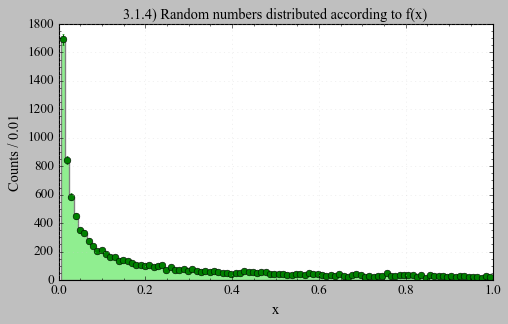

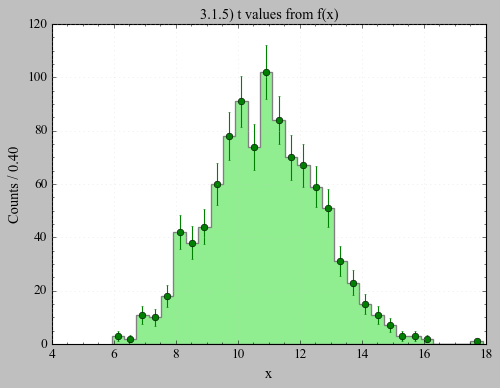

Text(0.5, 22.0, 't')

In [23]:
# Let f(x) = C*x**(−0.9) be proportional to a PDF for x ∈ [0.005, 1].

# 3.1.1) In order to fulfill the normalization criteria of a PDF, what value should C have?

#using my own function for the invers transformation method, as the function is invertable. 

f = 'x**(-0.9)'
x_min = 0.005
x_max = 1
N =10000

x_val , Normalization , f_inverse = inverse_transform(f,N, x_min, x_max)

#Normalization constant C
print(f'3.1.1) Normalization constant C = {Normalization:.3f}')


# 3.1.2) What method would you use to produce random numbers according to f(x)? Why?

print('3.1.2) Inverse transformation method, since the function is invertable. However, on the domain [0.005,1] the acceptance-rejection method would also work, since the the function is bound. ')

# 3.1.3) What would your answer be, if the allowed range was x ∈ [0, 1]?
print('3.1.3) If the domain was expanded to either 0 or infinity, the inverse transformation method would be the only option, as the function would diverge in the limits.')


# 3.1.4) Produce 10000 random numbers distributed according to f(x) and plot these.
easy_hist(x_val, xrange=(x_min,x_max),Nbins=100,Figsize=(7,4),title='3.1.4) Random numbers distributed according to f(x)');


# 3.1.5) Let t be a sum of 50 random values from f(x), and generate 1000 values of t. Do they follow a Gaussian distribution? And does their mean match the analytical expectation?
r = np.random.RandomState(42)
t = np.zeros(1000)
for i in range(1000):
    t[i] = np.sum(r.choice(x_val, 50))


fig, ax, counts = easy_hist(t, xrange=(min(t),max(t)),Nbins=30,Figsize=(7,5),title='3.1.5) t values from f(x)');
plt.close()
ax.set_xlabel('t')



